## Linear Regression with threshold optimization
Need to add crossvalidation

In [1]:
#Import all the files to be shared among all notebooks 
import utils
import preprocessing
import data_visualization
import feature_engineering
from ML_algorithms import *
import pandas as pd
from seaborn import countplot

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jovyan/work/PC/MLProjects/Proposal/utils.py:121: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  X_test = scaler.transform(X_test)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by 

Profit: 0.46


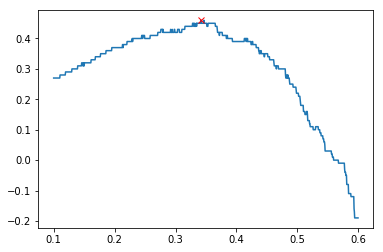

In [22]:
df = utils.get_dataset()
df = preprocessing.encode_education(df)
df = feature_engineering.partner_binary(df)
del df["Marital_Status"]
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)
df = preprocessing.impute_income_KNN(df)
 
X,y = utils.X_y_split(df)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
y_predicted = utils.cross_validation_average_results(model, X, y, n_splits=5,scaler=StandardScaler())

threshold = utils.max_threshold(y_predicted, y, threshold_range = (0.1, 0.6),iterations=1000, visualization=True)


y_pred = utils.predict_with_threshold(y_predicted,threshold)
print("Profit:", utils.profit_share(y_pred, y))
columns=[]
for column, value in zip(X.columns,model.coef_):
    if abs(value) > 0.05:
        columns.append(column)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/jovyan/work/PC/MLProjects/Proposal/utils.py:121: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  X_test = scaler.transform(X_test)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_pa

Profit: 0.4


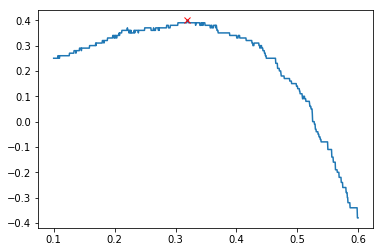

In [23]:
df = utils.get_dataset()
df = preprocessing.encode_education(df)
df = feature_engineering.partner_binary(df)
del df["Marital_Status"]
df = preprocessing.encode_days_as_costumer(df)
df = feature_engineering.drop_useless_columns(df)
df = preprocessing.impute_income_KNN(df)
 
X,y = utils.X_y_split(df)
X = X[columns]
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

model = LinearRegression()
y_predicted = utils.cross_validation_average_results(model, X, y, n_splits=5,scaler=StandardScaler())

threshold = utils.max_threshold(y_predicted, y, threshold_range = (0.1, 0.6),iterations=1000, visualization=True)


y_pred = utils.predict_with_threshold(y_predicted,threshold)
print("Profit:", utils.profit_share(y_pred, y))
columns=[]
for column, value in zip(X.columns,model.coef_):
    if abs(value) > 0.03:
        columns.append(column)

In [25]:
columns

['Dt_Customer',
 'Recency',
 'AcceptedCmp3',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'Partner']